   Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Region_North  \
0     1.335747             0.023821         0.674477           0.0   
1     1.703634            -1.312747         1.368028           0.0   
2    -1.546977             0.317020         0.057988           1.0   
3     1.681287            -1.504137         1.599212           1.0   
4     0.694233             0.569997         0.212110           0.0   

   Region_South  Region_West  Soil_Type_Clay  Soil_Type_Loam  Soil_Type_Peaty  \
0           0.0          1.0             0.0             0.0              0.0   
1           1.0          0.0             1.0             0.0              0.0   
2           0.0          0.0             0.0             1.0              0.0   
3           0.0          0.0             0.0             0.0              0.0   
4           1.0          0.0             0.0             0.0              0.0   

   Soil_Type_Sandy  Soil_Type_Silt  Crop_Cotton  Crop_Maize  Crop_Rice  \
0              1.0

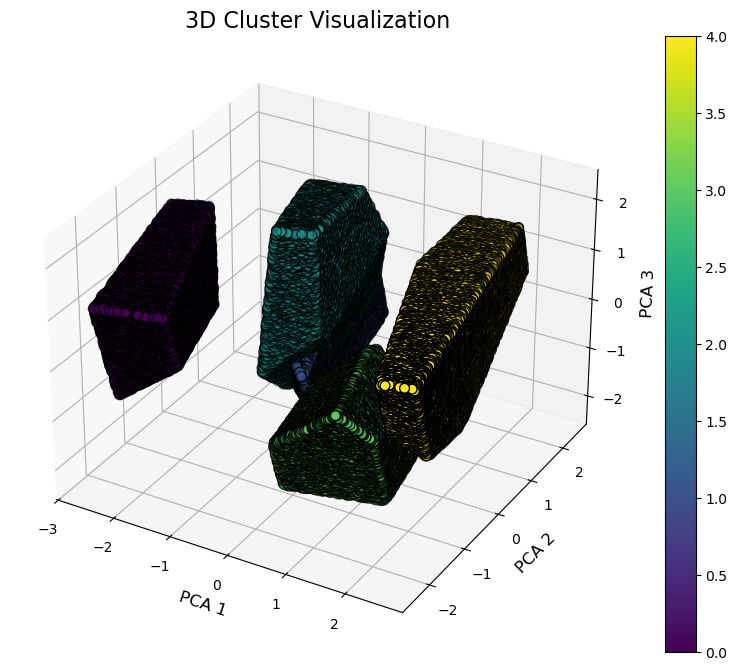

In [16]:
import pandas as pd
import ssl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


ssl._create_default_https_context = ssl._create_unverified_context
pd.set_option('display.max_columns', None)

df = pd.read_csv("/Users/markraeven17/COMPSCI/crop_yield.csv")
df.head()
X = df.drop(columns=['Yield_tons_per_hectare'])
y = df[['Yield_tons_per_hectare']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)]
)

preprocessed_data = preprocessor.fit_transform(df)

# Convert back to a DataFrame
# Extract column names for the transformed data
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = list(numerical_features) + list(encoded_cat_columns)

preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)

# Display the first few rows
print(preprocessed_df.head())



# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(preprocessed_df)

# Add cluster labels to the DataFrame
preprocessed_df['Cluster'] = cluster_labels

preprocessed_df.head()
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(preprocessed_df)
reduced_df = pd.DataFrame(reduced_data_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df['Cluster'] = cluster_labels

# Step 3: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster, with different colors
scatter = ax.scatter(reduced_df['PCA1'], reduced_df['PCA2'], reduced_df['PCA3'],
                     c=reduced_df['Cluster'], cmap='viridis', s=50, edgecolor='k')

# Title and labels
ax.set_title('3D Cluster Visualization', fontsize=16)
ax.set_xlabel('PCA 1', fontsize=12)
ax.set_ylabel('PCA 2', fontsize=12)
ax.set_zlabel('PCA 3', fontsize=12)

# Add color bar to indicate the cluster labels
fig.colorbar(scatter)

plt.show()